# Aumentando a potência de transmissão

Simulating an average UL SE as a function of the SNR for different cases of inter-cell
interference strength, β¯ ∈ {−10, −30} dB, and different channel models.

In [67]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special

C:\Users\wissa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Users\wissa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


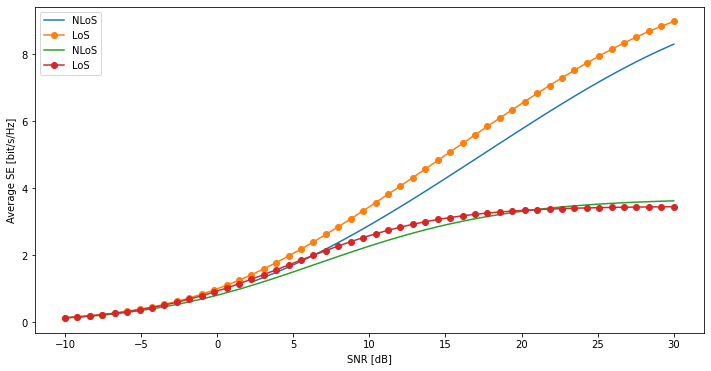

In [75]:
#Definir função para inversão dB
def inv_dB(dB):
    return 10**(dB/10)

#Definir função do SE em NLoS
def nlos(snr, beta):
    nlos = (np.exp(1/snr)*special.expn(1,1/snr) - np.exp(1/(snr*beta))*special.expn(1,1/(snr*beta)))/(np.log(2)*(1-beta))
    return nlos

#Definir função do SE em LoS
def los(snr, beta):
    val = 1+(1/(beta+(1/snr)))
    return np.log2(1+(1/(beta+(1/snr))))

beta = inv_dB(np.array([-30,-10]))
snr_dB = np.linspace(-10,30)
snr = inv_dB(snr_dB)

plt.figure(figsize=(12,6))
for i in beta:
    los = np.vectorize(los)
    nlos = np.vectorize(nlos)
    
    #Plot
    plt.xlabel('SNR [dB]')
    plt.ylabel('Average SE [bit/s/Hz]')
    plt.plot(snr_dB, nlos(snr, i), label= 'NLoS')
    plt.plot(snr_dB, los(snr, i), label= 'LoS', marker ='o')
    plt.legend()
plt.show()